In [1]:
from copy import deepcopy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('./xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,Temperature Difference,Pressure Difference
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


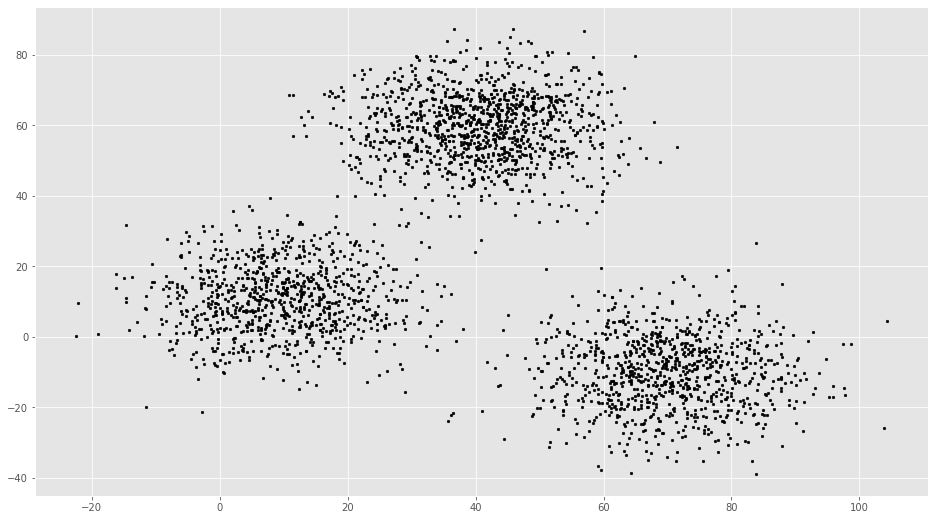

In [3]:
f1 = data['Temperature Difference'].values
f2 = data['Pressure Difference'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

[[40. 27.]
 [44. 65.]
 [66.  1.]]


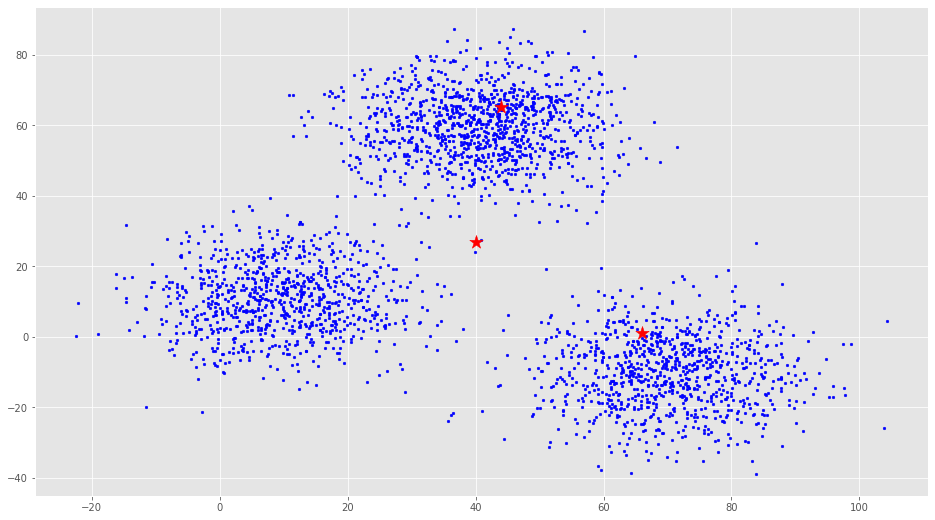

In [5]:
# Number of clusters
k = 3

# XY coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=float)
print(C)
# Plotting along with the centroids
plt.scatter(f1, f2, c='b', s=7)
plt.scatter(C_x, C_y, s=200, marker='*', c='r')

In [6]:
# To store the value of the centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Labels(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)

113.34460728239345


In [7]:
# Loop will run till the error becomes zero
while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)

    # Finding the new centroids by taking the average value.
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        print(error)

30.64029315143365
31.022739396508054
33.197748885023394
4.036362223163582
4.313937654044532
4.314154639949873
0.17194670033562845
0.2091622330267164
0.2091622330267164
0.0
0.0
0.0


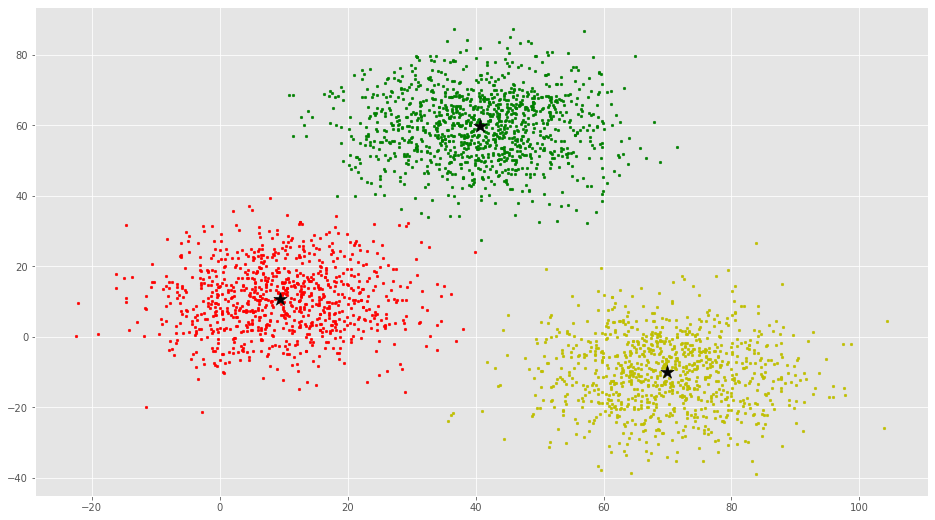

In [8]:
colors = ['r', 'g', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')